In [28]:
import pandas as pd
import matplotlib.pyplot as plt

In [79]:
df=pd.read_csv('GlobalLandTemperaturesByCity.csv')
df.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1743-11-01,6.068,1.737,Århus,Denmark,57.05N,10.33E
1,1743-12-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
2,1744-01-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
3,1744-02-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
4,1744-03-01,NaN,NaN,Århus,Denmark,57.05N,10.33E


In [82]:
df=df.dropna().reset_index()
df['AverageTemperature'].head()

0     6.068
1     5.788
2    10.644
3    14.051
4    16.082
Name: AverageTemperature, dtype: float64

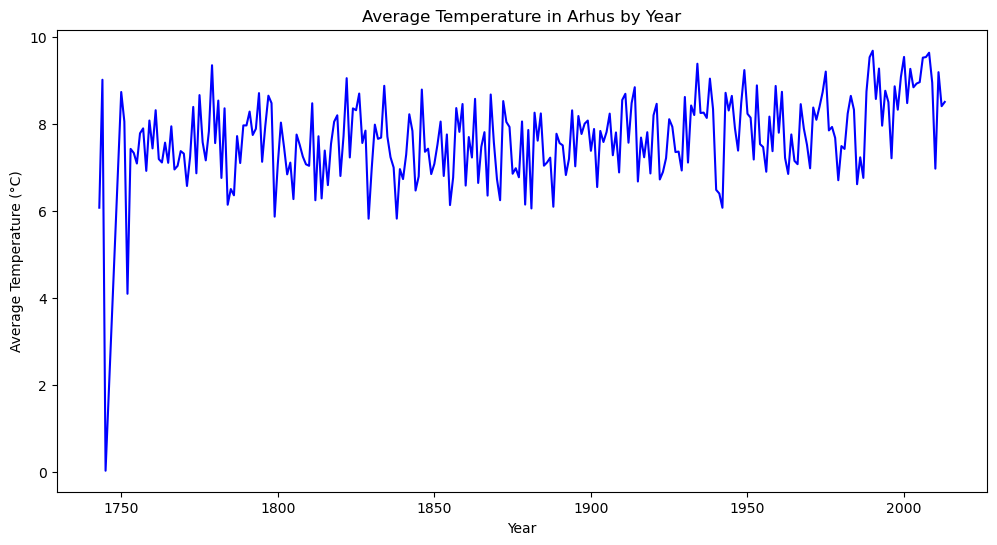

In [83]:
city = df[df['City'] == 'Århus'].copy()
city['dt'] = pd.to_datetime(city['dt'], errors='coerce')
city['Year'] = city['dt'].dt.year
annual_avg_temp = city.groupby('Year')['AverageTemperature'].mean().reset_index()
plt.figure(figsize=(12, 6))
plt.plot(annual_avg_temp['Year'], annual_avg_temp['AverageTemperature'], linestyle='-', color='blue')
plt.title('Average Temperature in Arhus by Year')
plt.xlabel('Year')
plt.ylabel('Average Temperature (°C)')
plt.show()

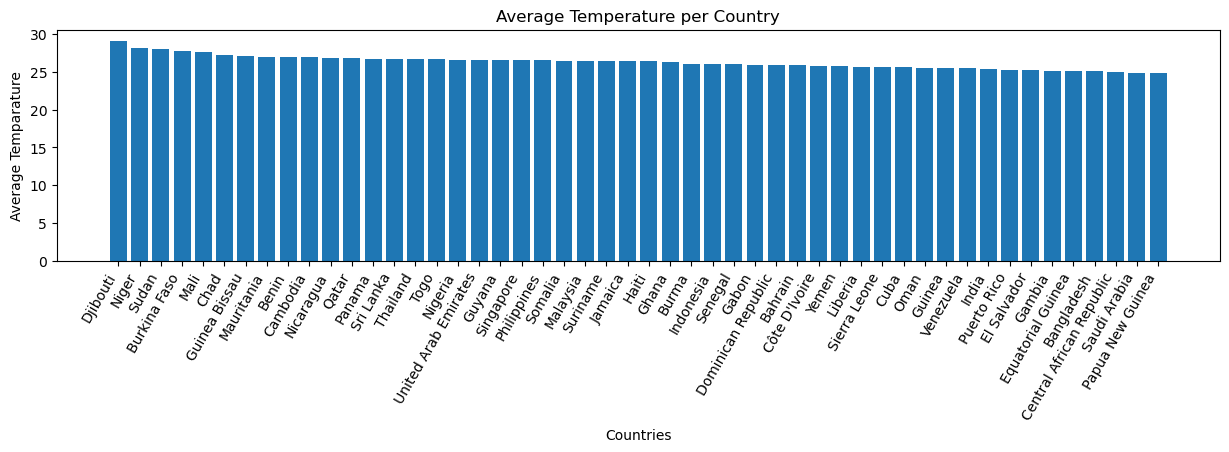

In [84]:
annual_avg_temp_country = df.groupby('Country')['AverageTemperature'].mean().reset_index()
top_countries=annual_avg_temp_country.sort_values(by='AverageTemperature',ascending=False).head(50)
plt.figure(figsize=(15,3))
plt.bar(top_countries['Country'],top_countries['AverageTemperature'])
plt.xlabel('Countries')
plt.ylabel('Average Temparature')
plt.title('Average Temperature per Country')
plt.xticks(rotation=60,ha='right')
plt.show()

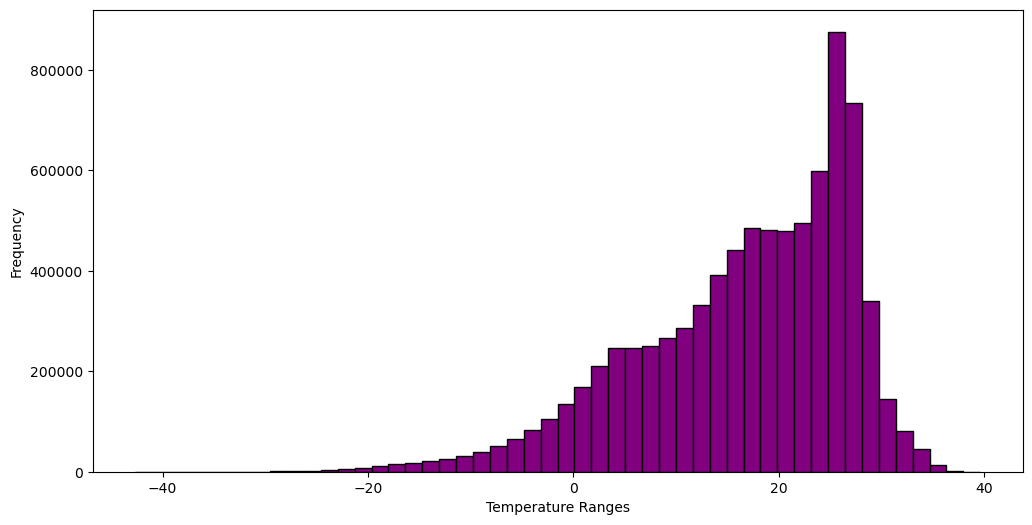

In [85]:
plt.figure(figsize=(12,6))
plt.hist(df['AverageTemperature'],bins=50,color='purple',edgecolor='black')
plt.xlabel('Temperature Ranges')
plt.ylabel('Frequency')
plt.show()

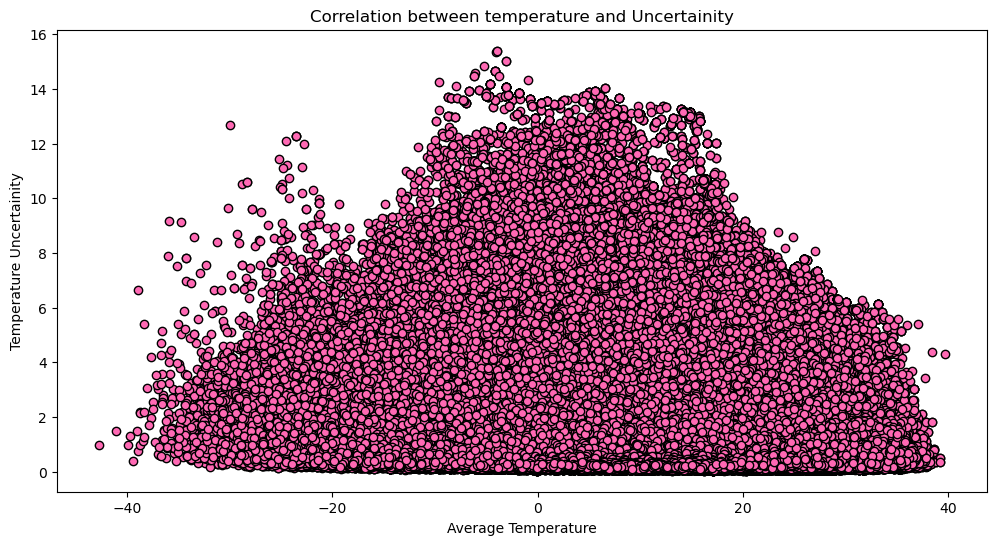

In [86]:
df['AverageTemperatureUncertainty']=df['AverageTemperatureUncertainty'].fillna(df['AverageTemperatureUncertainty'].mean())
plt.figure(figsize=(12,6))
plt.scatter(df['AverageTemperature'],df['AverageTemperatureUncertainty'],color='hotpink',edgecolor='black')
plt.xlabel('Average Temperature')
plt.ylabel('Temperature Uncertainity')
plt.title('Correlation between temperature and Uncertainity')
plt.show()

Summary for countries between 2010-01-01 and 2020-01-01:
Q1 (25th percentile): 12.192172280844156
Median (50th percentile): 21.189576923076924
Q3 (75th percentile): 26.397007386363637
Interquartile Range (IQR): 14.20483510551948
Lower Bound for Outliers: -9.115080377435065
Upper Bound for Outliers: 47.70426004464286
Outliers: []


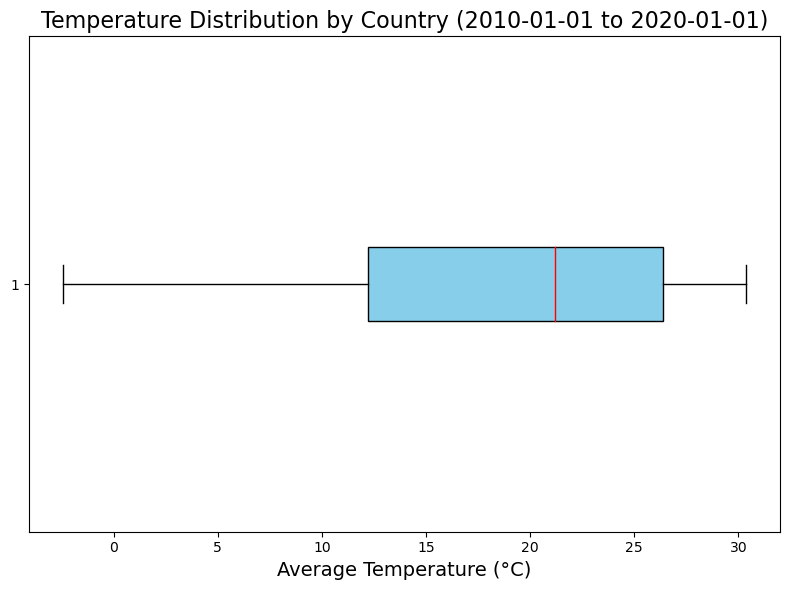

In [87]:

# Ensure 'dt' column is in datetime format
df['dt'] = pd.to_datetime(df['dt'])

# Define the date range
start_date = '2010-01-01'
end_date = '2020-01-01'

# Filter the DataFrame by the specified date range
df_filtered = df[(df['dt'] >= start_date) & (df['dt'] <= end_date)]

# Group by 'Country' and calculate the average temperature
avg_temp_by_country = df_filtered.groupby('Country')['AverageTemperature'].mean()

# Take only a few countries (e.g., top 10 warmest countries)
top_countries = avg_temp_by_country.head(10)

# Calculate quartiles, median, and outliers
Q1 = avg_temp_by_country.quantile(0.25)
Q2 = avg_temp_by_country.median()
Q3 = avg_temp_by_country.quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = avg_temp_by_country[(avg_temp_by_country < lower_bound) | (avg_temp_by_country > upper_bound)]

# Print summary statistics
print(f"Summary for countries between {start_date} and {end_date}:")
print(f"Q1 (25th percentile): {Q1}")
print(f"Median (50th percentile): {Q2}")
print(f"Q3 (75th percentile): {Q3}")
print(f"Interquartile Range (IQR): {IQR}")
print(f"Lower Bound for Outliers: {lower_bound}")
print(f"Upper Bound for Outliers: {upper_bound}")
print(f"Outliers: {outliers.index.values}")

# Plotting the box plot
plt.figure(figsize=(8, 6))
plt.boxplot(avg_temp_by_country, vert=False, patch_artist=True, boxprops=dict(facecolor='skyblue', color='black'), 
            medianprops=dict(color='red'), whiskerprops=dict(color='black'), capprops=dict(color='black'))

plt.title(f'Temperature Distribution by Country ({start_date} to {end_date})', fontsize=16)
plt.xlabel('Average Temperature (°C)', fontsize=14)
plt.tight_layout()
plt.show()


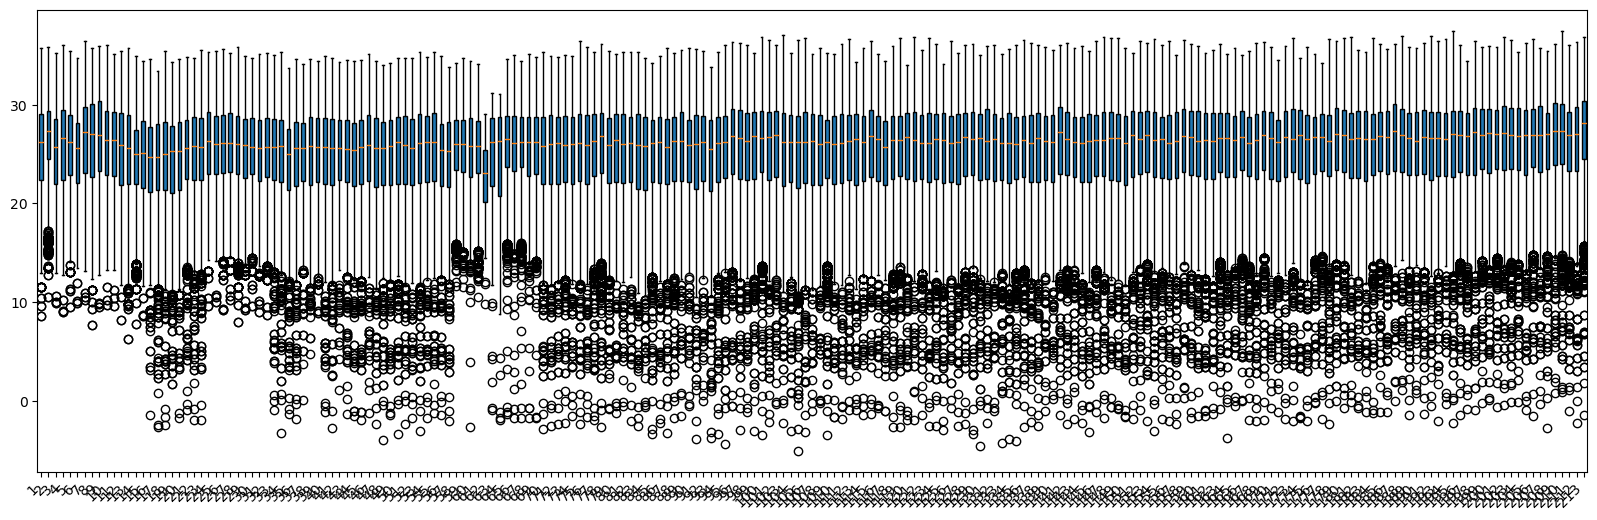

In [104]:
country=df[df['Country']=='India'].copy()
country['dt']=pd.to_datetime(country['dt'],errors='coerce')
country=country.dropna(subset=['dt'])
country['Year']=country['dt'].dt.year
grouped=[group['AverageTemperature'] for _,group in country.groupby('Year')]
plt.figure(figsize=(20,6))
plt.boxplot(grouped,showfliers=True,patch_artist=True)
plt.xticks(rotation=45,ha='right')
plt.show()

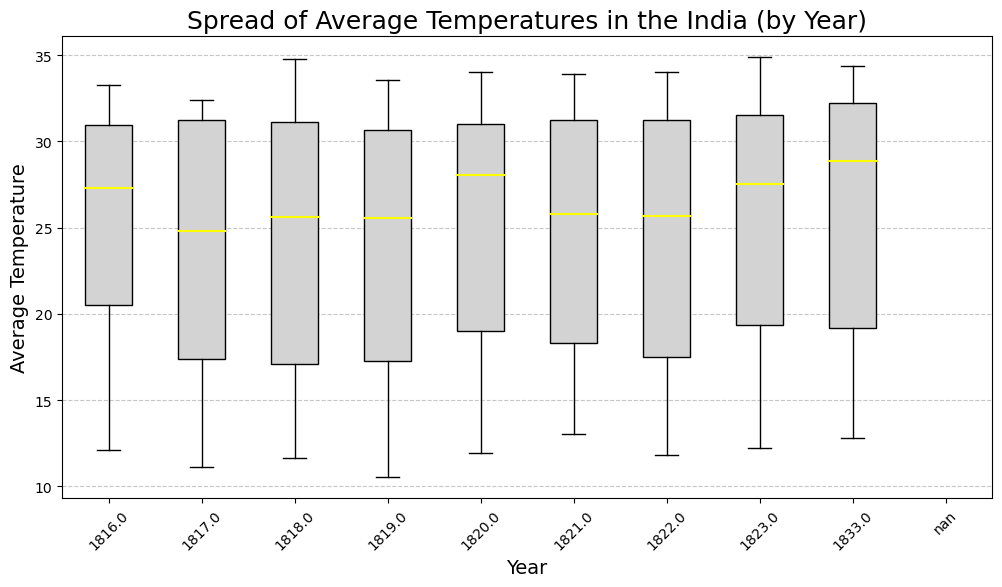

In [96]:
import matplotlib.pyplot as plt

# Filter the dataset for the specific country
country_data = df[df['Country'] == 'India'].dropna()

# Extract the relevant data: Year and AverageTemperature
country_data['Year'] = pd.to_datetime(country_data['dt']).dt.year.head(100)
temperature_data = country_data[['Year', 'AverageTemperature']]

# Plot boxplot for temperature spread by year
plt.figure(figsize=(12, 6))
plt.boxplot(
    [temperature_data[temperature_data['Year'] == year]['AverageTemperature'] for year in temperature_data['Year'].unique()],
    labels=temperature_data['Year'].unique(),
    patch_artist=True,
    boxprops=dict(facecolor='lightgrey', color='black'),
    medianprops=dict(color='yellow', linewidth=1.5),
    flierprops=dict(marker='o', color='red', alpha=0.5),
)

plt.title('Spread of Average Temperatures in the India (by Year)', fontsize=18)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Average Temperature', fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()
